In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


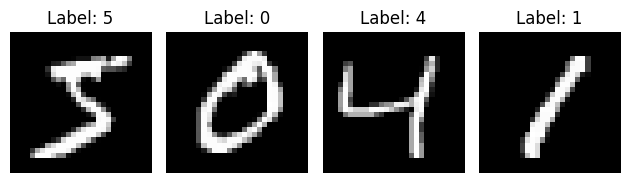

In [54]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# print(x_train[0])
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0


print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')



/home/ardo/mlem/Study/Sem8/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9138 - loss: 0.3039 - val_accuracy: 0.9525 - val_loss: 0.1647
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9593 - loss: 0.1402 - val_accuracy: 0.9612 - val_loss: 0.1260
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9694 - loss: 0.1011 - val_accuracy: 0.9689 - val_loss: 0.1067
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9762 - loss: 0.0792 - val_accuracy: 0.9703 - val_loss: 0.0928
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9805 - loss: 0.0651 - val_accuracy: 0.9739 - val_loss: 0.0870
313/313 - 1s - 3ms/step - accuracy: 0.9739 - loss: 0.0870
Test accuracy: 0.9739000201225281


In [45]:
model.save_weights("mnist.weights.h5")

In [46]:
import h5py

file = h5py.File("mnist.weights.h5", "r")

for key in file.keys():
    print(key)

def print_structure(name, obj):
    print(name)

# file.visititems(print_structure)

layers
optimizer
vars


In [47]:
import numpy as np

kernel1 = np.array(file["layers"]["dense"]["vars"]["0"][:])
bias1 = np.array(file["layers"]["dense"]["vars"]["1"][:])

kernel2 = file["layers"]["dense_1"]["vars"]["0"][:]
bias2   = file["layers"]["dense_1"]["vars"]["1"][:]

print(kernel1.shape)
print(bias1.shape)

print(kernel2.shape)
print(bias2.shape)

(784, 64)
(64,)
(64, 10)
(10,)


In [50]:
kernel1[:,0]


array([ 3.57776582e-02, -7.35254809e-02, -1.35076120e-02, -7.22072423e-02,
       -4.39401120e-02,  2.98909023e-02, -2.61250362e-02, -3.29070576e-02,
        6.53620437e-02,  6.68482557e-02,  5.94612285e-02, -4.77246717e-02,
        9.51289535e-02, -2.60818917e-02, -3.27639543e-02,  6.23930544e-02,
       -3.54688577e-02,  9.74086672e-03,  7.69216791e-02, -3.49898674e-02,
        2.35544145e-02,  8.18200782e-02,  6.21344671e-02, -6.39450550e-02,
        1.36079490e-02,  6.07033744e-02,  6.13322854e-03,  6.15494773e-02,
       -7.22374246e-02,  5.83767518e-02,  5.22365794e-02, -5.91769293e-02,
        3.83417010e-02, -5.48053086e-02, -3.10507007e-02,  2.04480160e-02,
       -6.25023246e-02, -5.54080009e-02, -1.25948459e-01,  3.46477814e-02,
       -1.06136657e-01, -1.64767839e-02, -4.41948995e-02, -1.20250590e-01,
       -1.25968665e-01, -9.66382772e-02, -5.23099266e-02,  3.10024172e-02,
        5.77957630e-02, -7.46156573e-02, -6.55629113e-02,  1.39255980e-02,
        6.25357851e-02,  

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8694 - loss: 0.4521 - val_accuracy: 0.9234 - val_loss: 0.2560
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9322 - loss: 0.2387 - val_accuracy: 0.9373 - val_loss: 0.2227
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9420 - loss: 0.2045 - val_accuracy: 0.9384 - val_loss: 0.2022
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9469 - loss: 0.1866 - val_accuracy: 0.9456 - val_loss: 0.1869
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9506 - loss: 0.1729 - val_accuracy: 0.9454 - val_loss: 0.1868
313/313 - 1s - 3ms/step - accuracy: 0.9454 - loss: 0.1868
Test accuracy: 0.9453999996185303
